In [ ]:

#Import libraries
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
import scipy.stats as stats
from sklearn import preprocessing,metrics,model_selection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.externals import joblib

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error,mean_squared_error, r2_score, mean_absolute_error



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Importing the dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep= ';')

#1. Exploratory data analysis

## 1.1 Data at glance

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#Data Glance
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Null values for each column
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# Labels for each column
for col in data.columns:
  print(col,':', data[col].nunique(), 'labels')

age : 78 labels
job : 12 labels
marital : 4 labels
education : 8 labels
default : 3 labels
housing : 3 labels
loan : 3 labels
contact : 2 labels
month : 10 labels
day_of_week : 5 labels
duration : 1544 labels
campaign : 42 labels
pdays : 27 labels
previous : 8 labels
poutcome : 3 labels
emp.var.rate : 10 labels
cons.price.idx : 26 labels
cons.conf.idx : 26 labels
euribor3m : 316 labels
nr.employed : 11 labels
y : 2 labels


##1.2 Univariate analysis

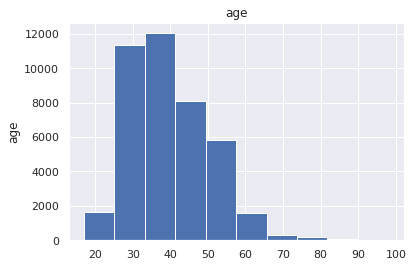

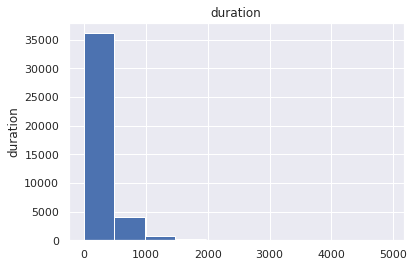

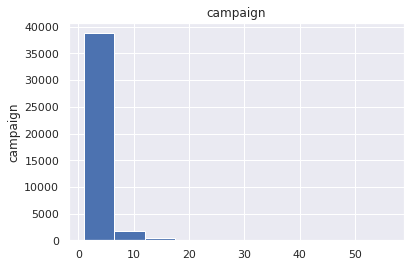

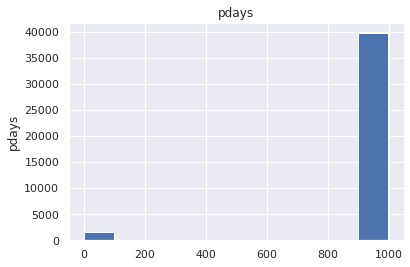

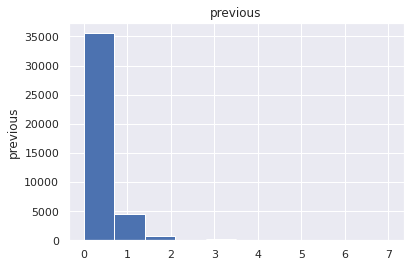

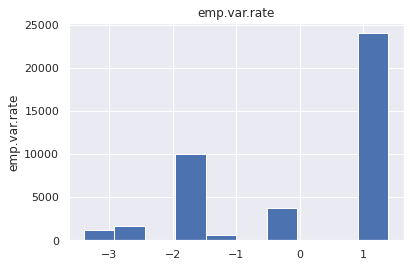

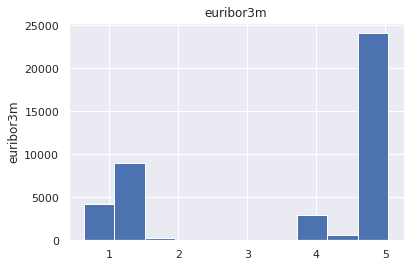

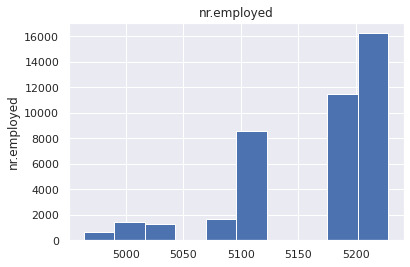

In [ ]:
# Plot histograms to understand the distribution of numeric variables
def numerical_variables(df, var):
 df.hist(var)
 plt.title(var)
 plt.ylabel(var)
 plt.show()

for var in ['age','duration','campaign', 'pdays', 'previous','emp.var.rate','euribor3m', 'nr.employed']:
  numerical_variables(data, var)


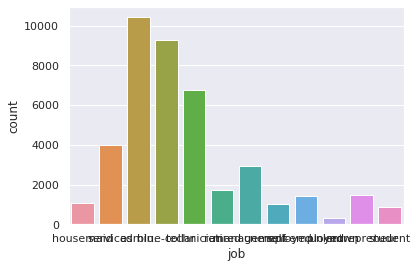

In [34]:
#some catagorical_variables
sns.countplot(x ='job', data = data)


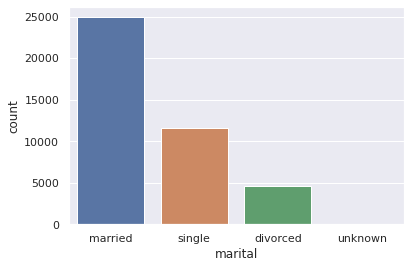

In [35]:
sns.countplot(x ='marital', data = data)

##1.3 Bivariate analysis

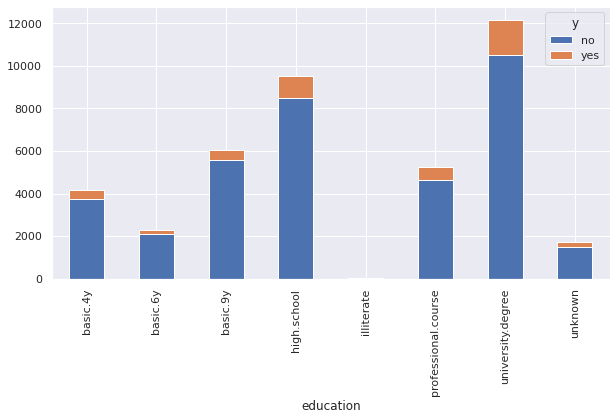

In [ ]:
# The target column ditribution across the education levels
rplot = data.groupby(['education', 'y']).size().reset_index().pivot(columns='y', index='education', values=0)
rplot.plot.bar(stacked=True, figsize=(10,5))

##1.4 Class imbalance

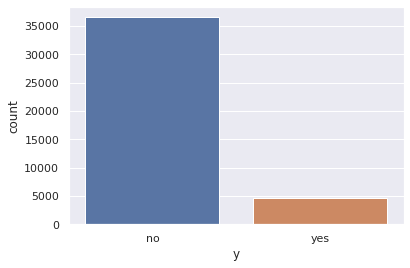

In [ ]:
sns.countplot(x ='y', data = data)

The class is highly imbalanced. This brings skewness on the distribition and affect the accuracy of our modele.Therefore we will use oversampling of the 'no' class.

##1.5 Correlation among continuous columns



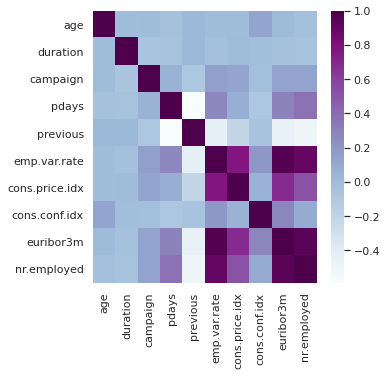

In [ ]:
#correlation among the features
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot= False, cmap="BuPu")

We can observe a high correlation between euribor3m and emp.var rate. this affects our model too, therefore should not be used for training.

##1.6 Correlation between the features and the target variable

In [ ]:
# Encoding labels to the target variable
label_encoder = preprocessing.LabelEncoder()  
data['y']= label_encoder.fit_transform(data['y'])

#Correlation with output variable
cor = data.corr()
cor_target = abs(cor["y"])
print(cor_target[cor_target>0])

age               0.030399
duration          0.405274
campaign          0.066357
pdays             0.324914
previous          0.230181
emp.var.rate      0.298334
cons.price.idx    0.136211
cons.conf.idx     0.054878
euribor3m         0.307771
nr.employed       0.354678
y                 1.000000
Name: y, dtype: float64


duration highly affects the output target (e.g. if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known,thereforewe won't be using duration for training the model.

##1.7 Checking for outliers

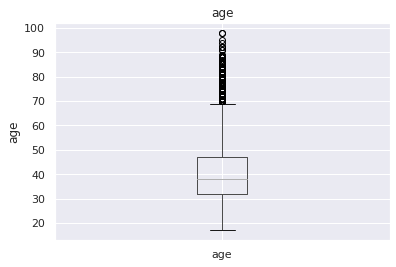

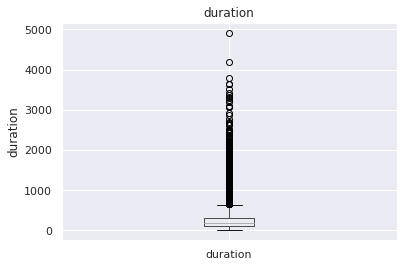

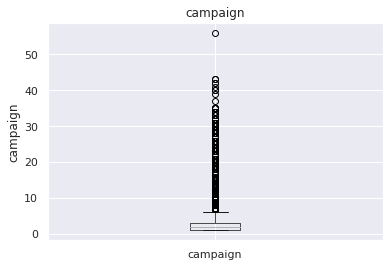

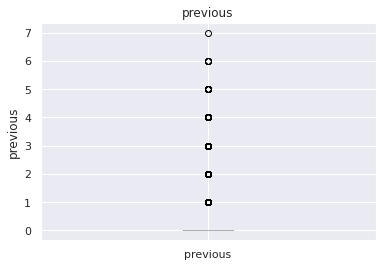

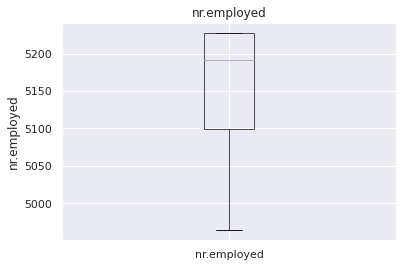

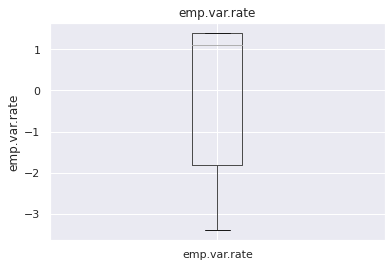

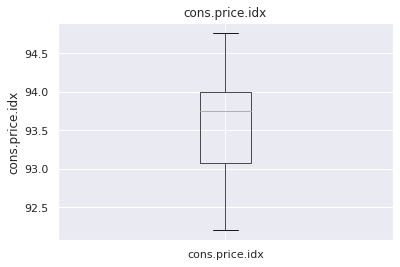

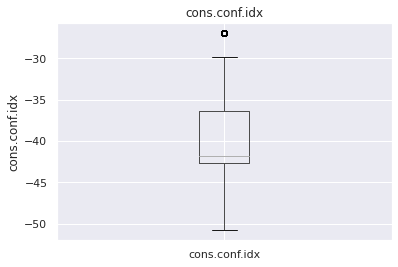

In [ ]:
# Define function to plot boxplots in order to check the existence of outliers
def find_outliers(df, var):
    
    df.boxplot(var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in ['age','duration', 'campaign','previous', 'nr.employed', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']:
    find_outliers(data, var)

columns with outliers are: age, duration, campaign and previous

#2. *Classification* Model for Predicting Term Deposit

##2.1 Preprocessing

###2.1.1 Handling outliers

In [ ]:
# Function to define the upper and lower whisker
def find_normal_boundaries(df, var, distance):

    # calculate the boundaries outside which sit the outliers
    upper_whisker = df[var].mean() + distance * df[var].std()
    lower_whisker = df[var].mean() - distance * df[var].std()

    return upper_whisker, lower_whisker

# Columns with outliers
cols = [ 'age', 'duration', 'campaign', 'previous']
for i in cols:
  upper_limit, lower_limit = find_normal_boundaries(data, i, 1.5)
  
  # Substitute the high values with upper whisker
  # and low values with lower whisker
  data[i]= np.where(data[i] > upper_limit, upper_limit,                      
                       np.where(data[i] < lower_limit, lower_limit, data[i]))

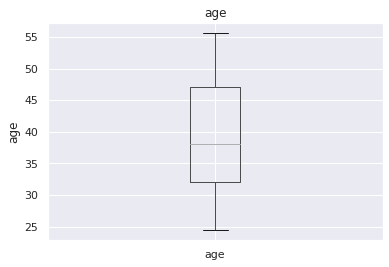

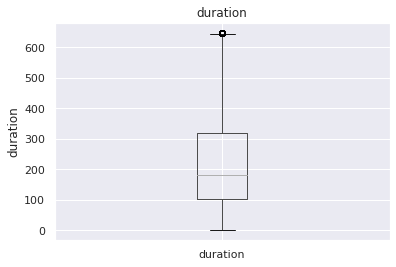

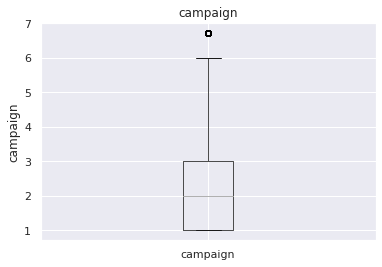

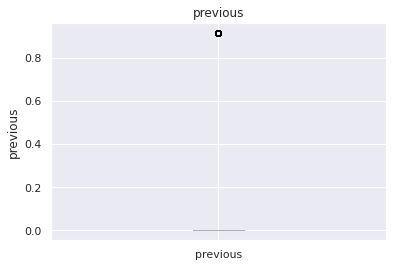

In [ ]:
# Boxplot to check the handled outliers
for var in cols:
    find_outliers(data, var)



###2.1.2 Encode categorical variables

In [ ]:
df = data.copy()
df = pd.get_dummies(data, drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,55.655935,261.0,1.0,999,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,55.655935,149.0,1.0,999,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37.000000,226.0,1.0,999,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40.000000,151.0,1.0,999,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,55.655935,307.0,1.0,999,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


###2.1.3 Oversampling the Minority class

The function below will be used for oversampling minority class in imbalanced class.

In [ ]:
def Over_sampler(df):
  # Oversampling df on condition
  from sklearn.utils import resample
  # Separate majority and minority classes
  yes_total = len(df[df.y_yes == 1].index)
  no_total = len(df[df.y_yes == 0].index)

  if (yes_total >= no_total):
    df_majority = df[df.y_yes==1]
    df_minority = df[df.y_yes==0]
  else:
    df_majority = df[df.y_yes==0]
    df_minority = df[df.y_yes==1]

  majority = max(yes_total, no_total)
  minority = min(yes_total, no_total)
  # Upsample minority class
  df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=majority,    # final minority class size
                                 random_state=minority) # reproducible results
  # Combine majority class with upsampled minority class
  return pd.concat([df_majority, df_minority_upsampled])

In [ ]:
# checking the oversampled size
df1 = df.copy()
os= Over_sampler(df1)
# Check the upsampled size
os.y_yes.value_counts()


1    36548
0    36548
Name: y_yes, dtype: int64

Now our data is balanced.


###2.1.4 Feature importance

In [ ]:
# Define features and the target variable
x = os.loc[:, df.columns != 'y_yes', ]
y = os['y_yes']

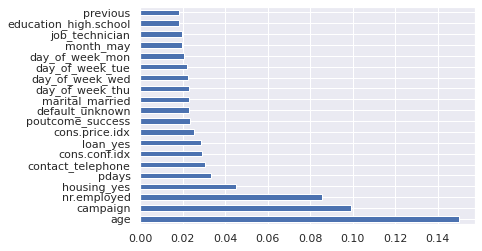

In [ ]:
#feature importance
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

We observe the most important features, those that are highly correlated won't be used for training the model.

##2.2 Modeling

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression
Average k-fold and Stratified K-Fold Accuracy for Logistic Regression : 0.82005 , 0.66344
F1, Precision and recall scores respectively for Logistic Regression : 0.75358 , 0.77380 , 0.75818
ROC curve for Logistic Regression


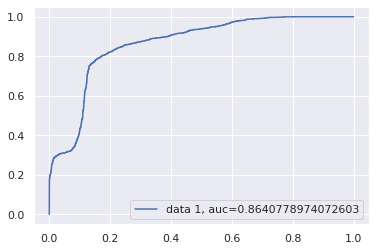

XGBoost
Average k-fold and Stratified K-Fold Accuracy for XGBoost : 0.86825 , 0.72051
F1, Precision and recall scores respectively for XGBoost : 0.84893 , 0.85362 , 0.84989
ROC curve for XGBoost


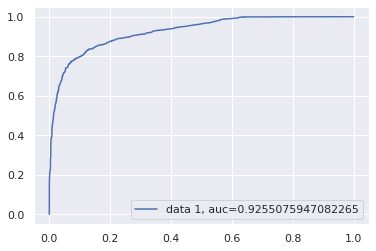

Multilayer perceptron
Average k-fold and Stratified K-Fold Accuracy for Multilayer perceptron : 0.84212 , 0.70406
F1, Precision and recall scores respectively for Multilayer perceptron : 0.82524 , 0.82643 , 0.82564
ROC curve for Multilayer perceptron


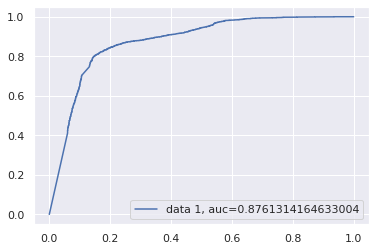

In [28]:
df = data.copy()
df.drop(['duration', 'euribor3m', 'emp.var.rate'], axis=1, inplace=True)

# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Oversampling minority class to overcome class imbalance
df_upsampled = Over_sampler(df)

x1 = df_upsampled
y1 = df_upsampled['y_yes']

#split data into 90% training, 10% test data
x_train, x_test, y_train, y_test = train_test_split(df_upsampled , y1, test_size=0.1)


k_fold = KFold(n_splits=5, random_state=0)
classifiers = [
    LogisticRegression(random_state=0),
    xgb.XGBClassifier(random_state=0),
    MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
    ]

j=0
pipe_dict = {1:'Logistic Regression', 2:'XGBoost', 3:'Multilayer perceptron'}

for classifier in classifiers:
  j=j+1
  pipe = Pipeline(steps=[ ('scaler', MinMaxScaler()),
                          ('preprocessor', PCA(n_components=2)),
                          ('classifier', classifier)])
  pipe.fit(x_train, y_train)
  
  
  #K-fold validation 
  k_score = cross_val_score(pipe, x_train, y_train,cv=k_fold, scoring= 'accuracy').mean()  
  
  # Stratified K-fold
  accuracy = []
  skf = StratifiedKFold(n_splits=5)
  skf.get_n_splits(x1,y1)
  # enumerate the splits and summarize the distributions
  for train_index, test_index in k_fold.split(x1,y1):
    train_X, test_X = x1.iloc[train_index], x1.iloc[test_index]
    train_Y, test_Y = y1.iloc[train_index], y1.iloc[test_index]
    pipe.fit(train_X, train_Y)
    prediction = pipe.predict(test_X)
    score = accuracy_score(prediction, test_Y)
    accuracy.append(score)
    skf_accuracy=np.array(accuracy).mean()
    
  #F1, Precision and recall scores
  y_pred = pipe.predict(x_test)
  f1 = f1_score(y_test, y_pred, average="macro")
  precision = precision_score(y_test, y_pred, average="macro")
  recall = recall_score(y_test, y_pred, average="macro") 
  
  print('\033[1m' + pipe_dict[j])
  print("Average k-fold and Stratified K-Fold Accuracy for", pipe_dict[j],": %.5f" % k_score, ", %.5f" % skf_accuracy )
  print("F1, Precision and recall scores respectively for", pipe_dict[j],": %.5f" %f1, ", %.5f" %precision, ", %.5f" %recall)
  print("ROC curve for", pipe_dict[j])

  #ROC curve
  y_pred_proba = pipe.predict_proba(x_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()
   
   
    

From the three models XGBoost performs better for the given data.